# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tarisa Nur Safitri
- **Email:** trsa.nrsftr@gmail.com
- **ID Dicoding:** illyasv

## Menentukan Pertanyaan Bisnis

- Bagaimana curah hujan memengaruhi konsentrasi polutan di wilayah Guanyuan?
- Bagaimana kualitas udara di wilayah Guanyuan dibandingkan dengan di wilayah Huairou?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
guanyuan_df = pd.read_csv('/content/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [3]:
huairou_df = pd.read_csv('/content/PRSA_Data_Huairou_20130301-20170228.csv')
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
- Data yang dibaca adalah wilayah Guanyuan dan Huairou
- Tampak sekilas dari 5 baris teratas setiap wilayah masih terdapat beberapa kolom yang isinya 'NaN'

### Assessing Data

Assessing Data Guanyuan

In [4]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Mengecek jumlah missing value dari data wilayah Guanyuan

In [5]:
guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


Mengecek apakah ada data yang duplikat

In [6]:
print("Jumlah Duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah Duplikasi:  0


Menampilkan ringkasan parameter statistik dari data wilayah Guanyuan

In [7]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Assessing Data Huairou

In [8]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Mengecek jumlah missing value dari data wilayah Huairou

In [9]:
huairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


Mengecek ada data yang duplikat

In [10]:
print("Jumlah Duplikasi: ", huairou_df.duplicated().sum())

Jumlah Duplikasi:  0


Menampilkan ringkasan parameter statistik dari data wilayah Huairou

In [11]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


**Insight:**
- Data tidak ada yang duplikat
- Data terdapat banyak missing value
- Tipe data yang digunakan telah sesuai
- Value data sudah akurat

### Cleaning Data

Cleaning Data Wilayah Guanyuan

kolom "No" akan dihapus karena tidak diperlukan

In [12]:
guanyuan_df = guanyuan_df.drop(["No"], axis = 1)

In [13]:
guanyuan_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


mengatasi missing value 'wd' dengan menggantinya menggunakan nilai modus dari wd di wilayah Guanyuan

In [14]:
guanyuan_df.wd.mode()

,wd
0,NE


Mengisi missing value dengan modus data wd pada wilayah Guanyuan, yaitu 'NE'

In [15]:
guanyuan_df.wd.fillna(value= 'NE', inplace=True)

<ipython-input-15-80fdd8c8f9ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df.wd.fillna(value= 'NE', inplace=True)


Mengecek kolom yang masih terdapat missing value dan apakah missing value pada kolom 'wd' telah teratasi.

In [16]:
guanyuan_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753
O3,1173


Mengatasi missing value pada setiap kolom dengan menggunakan nilai mean dari setiap kolomnya

In [17]:
kolom_handle = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
guanyuan_df[kolom_handle] = guanyuan_df[kolom_handle].fillna(guanyuan_df[kolom_handle].mean())

Mengecek apakah semua missing value sudah teratasi

In [18]:
guanyuan_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [19]:
guanyuan_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [20]:
guanyuan_df.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan
35063,2017,2,28,23,15.0,27.0,5.0,53.0,600.0,33.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Guanyuan


Cleaning Data Wilayah Huairou

Menghapus kolom 'No' karena tidak diperlukan

In [21]:
huairou_df = huairou_df.drop(["No"], axis = 1)

In [22]:
huairou_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Mengatasi missing value 'wd' dengan menggantinya menggunakan nilai modus dari wd di wilayah Huairou

In [23]:
huairou_df.wd.mode()

,wd
0,NW


Mengisi Mengisi missing value dengan modus data wd pada wilayah Huairou, yaitu 'NW'

In [24]:
huairou_df.wd.fillna(value= 'NW', inplace=True)

<ipython-input-24-6af4d55ffc39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  huairou_df.wd.fillna(value= 'NW', inplace=True)


Mengecek kolom yang masih terdapat missing value dan apakah missing value pada kolom 'wd' telah teratasi.

In [25]:
huairou_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422
O3,1151


Mengatasi missing value pada setiap kolom dengan menggunakan nilai mean dari setiap kolomnya

In [26]:
huairou_df[kolom_handle] = huairou_df[kolom_handle].fillna(huairou_df[kolom_handle].mean())

Mengecek apakah semua missing value sudah teratasi

In [27]:
huairou_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [28]:
huairou_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,7.0,7.0,3.000000,2.00000,100.000000,91.000000,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2013,3,1,1,4.0,4.0,3.000000,32.49725,100.000000,92.000000,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,2013,3,1,2,4.0,4.0,12.121553,32.49725,100.000000,91.000000,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,2013,3,1,3,3.0,3.0,3.000000,2.00000,1022.554545,59.824713,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,2013,3,1,4,3.0,3.0,7.000000,32.49725,300.000000,86.000000,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [29]:
huairou_df.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou
35063,2017,2,28,23,11.0,20.0,2.0,27.0,400.0,77.0,6.7,1009.3,-13.6,0.0,NE,1.9,Huairou


**Insight:**
- Missing value dari data wilayah Guanyuan dan Huairou telah teratasi
- Data sudah siap untuk dieksplor

## Exploratory Data Analysis (EDA)
- Mencari nilai rata-rata polutan (PM2.5, PM10, SO2, NO2, CO, O3) pada wilayah Guanyuan dan Huairou

- Mencari korelasi antara curah hujan dengan polutan pada wilayah Guanyuan

### Explore dataset Guanyuan


In [30]:
guanyuan_df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,1.177213,3.448752,8.800218,6.922285,80.219412,91.011777,23.440303,34.818965,1135.362716,56.468060,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [31]:
guanyuan_df.agg({
    "PM2.5": ["mean"],
    "PM10": ["mean"],
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"],
})

,PM2.5,PM10,SO2,NO2,CO,O3
mean,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044


In [32]:
korelasi = guanyuan_df[['RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

kor_hujan = korelasi[['RAIN']].reset_index()
kor_hujan.columns = ['Polutan', 'Korelasi hujan dengan polutan']

print(kor_hujan)

  Polutan  Korelasi hujan dengan polutan
0    RAIN                       1.000000
1   PM2.5                      -0.010456
2    PM10                      -0.026149
3     SO2                      -0.040018
4     NO2                      -0.046667
5      CO                      -0.011693
6      O3                       0.022447


### Explore dataset Huairou


In [33]:
huairou_df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5245,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.06794,NaN,1.652021,NaN
std,1.177213,3.448752,8.800218,6.922285,70.250314,82.361555,18.630959,25.863003,880.325200,53.702006,11.742554,10.014524,14.041917,0.84838,NaN,1.198305,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.00000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,18.000000,29.000000,2.000000,13.000000,400.000000,19.000000,2.100000,999.400000,-9.600000,0.00000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,48.000000,71.000000,4.000000,27.000000,800.000000,51.000000,13.500000,1007.300000,2.600000,0.00000,NaN,1.300000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,96.000000,128.000000,13.000000,45.000000,1300.000000,81.000000,22.300000,1015.500000,15.300000,0.00000,NaN,2.000000,NaN


In [34]:
huairou_df.agg({
    "PM2.5": ["mean"],
    "PM10": ["mean"],
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"],
})

,PM2.5,PM10,SO2,NO2,CO,O3
mean,69.626367,91.48269,12.121553,32.49725,1022.554545,59.824713


**Insight:**
- Sebagian besar polutan (PM2.5, PM10, SO2, NO2, dan CO) menunjukan korelasi negatif dengan curah hujan. Hal tersebut mengartikan bahwa semakin tinggi curah hujan, semakin rendah pula konsentrasi polutan udara tersebut.

- Polutan ozon atau O3 berbanding terbalik dengan jenis polutan lainnya di mana semakin tinggi curah hujan, semakin tinggi pula konsentrasi ozon. Hal tersebut menyatakan bahwa terdapat korelasi positif antara curah hujan dengan polutan jenis Ozon atau O3.

- Rata-rata dari setiap polutan di wilayah Guanyuan dan Huairou menunjukkan bahwa polutan di Guanyuan lebih tinggi dibanding Huairou (kecuali ozon atau O3). Hal tersebut sekaligus menandakan bahwa curah hujan di Huairou cenderung sedikit lebih tinggi dibandingkan dengan Guanyuan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana curah hujan memengaruhi konsentrasi polutan di wilayah Guanyuan?

In [35]:
print(korelasi['RAIN'])

RAIN     1.000000
PM2.5   -0.010456
PM10    -0.026149
SO2     -0.040018
NO2     -0.046667
CO      -0.011693
O3       0.022447
Name: RAIN, dtype: float64


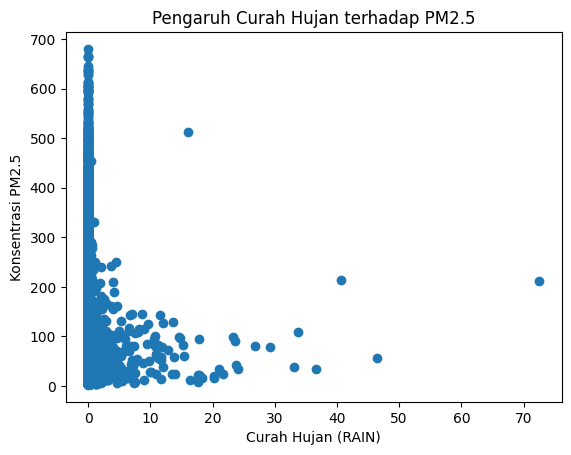

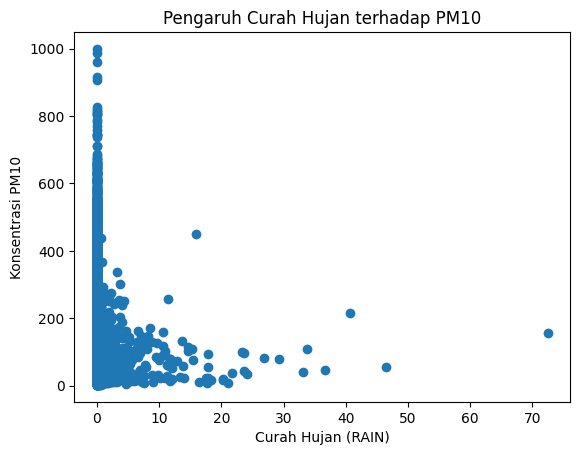

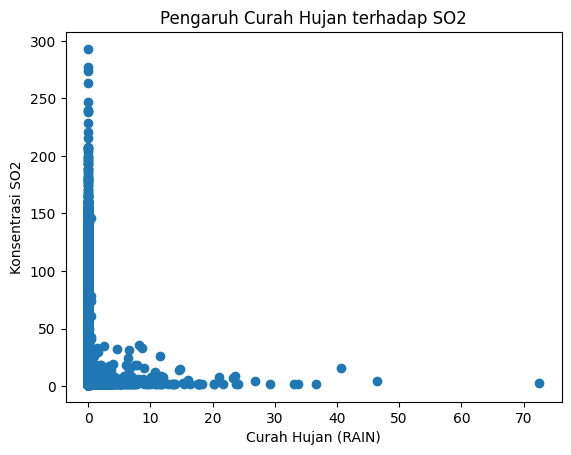

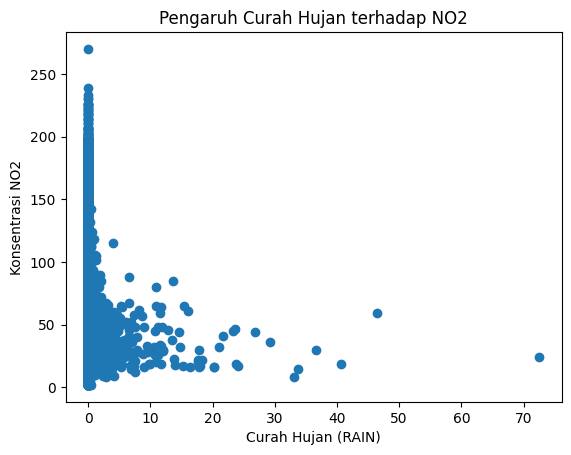

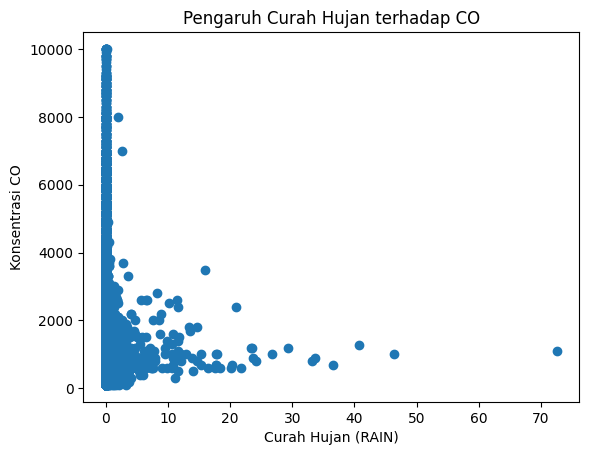

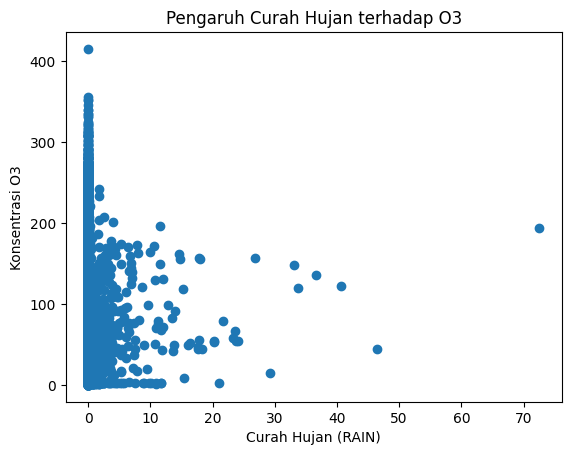

In [36]:
plt.scatter(guanyuan_df['RAIN'], guanyuan_df['PM2.5'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi PM2.5')
plt.title('Pengaruh Curah Hujan terhadap PM2.5')
plt.show()
print()

plt.scatter(guanyuan_df['RAIN'], guanyuan_df['PM10'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi PM10')
plt.title('Pengaruh Curah Hujan terhadap PM10')
plt.show()
print()

plt.scatter(guanyuan_df['RAIN'], guanyuan_df['SO2'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi SO2')
plt.title('Pengaruh Curah Hujan terhadap SO2')
plt.show()
print()

plt.scatter(guanyuan_df['RAIN'], guanyuan_df['NO2'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi NO2')
plt.title('Pengaruh Curah Hujan terhadap NO2')
plt.show()
print()

plt.scatter(guanyuan_df['RAIN'], guanyuan_df['CO'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi CO')
plt.title('Pengaruh Curah Hujan terhadap CO')
plt.show()
print()

plt.scatter(guanyuan_df['RAIN'], guanyuan_df['O3'])
plt.xlabel('Curah Hujan (RAIN)')
plt.ylabel('Konsentrasi O3')
plt.title('Pengaruh Curah Hujan terhadap O3')
plt.show()

In [37]:
x = guanyuan_df[['RAIN']]

# Model untuk PM2.5
ypm25 = guanyuan_df['PM2.5']

model = LinearRegression()
model.fit(x, ypm25)

print(f"Koefisien PM2.5: {model.coef_}, Intercept PM2.5: {model.intercept_}")

# Model untuk PM10
ypm10 = guanyuan_df['PM10']

model = LinearRegression()
model.fit(x, ypm10)

print(f"Koefisien PM10: {model.coef_}, Intercept PM10: {model.intercept_}")

# Model untuk SO2
yso2 = guanyuan_df['SO2']

model = LinearRegression()
model.fit(x, yso2)

print(f"Koefisien SO2: {model.coef_}, Intercept SO2: {model.intercept_}")

# Model untuk NO2
yno2 = guanyuan_df['NO2']

model = LinearRegression()
model.fit(x, yno2)

print(f"Koefisien NO2: {model.coef_}, Intercept NO2: {model.intercept_}")

# Model untuk CO
yco = guanyuan_df['CO']

model = LinearRegression()
model.fit(x, yco)

print(f"Koefisien CO: {model.coef_}, Intercept CO: {model.intercept_}")

# Model untuk O3
yo3 = guanyuan_df['O3']

model = LinearRegression()
model.fit(x, yo3)

print(f"Koefisien O3: {model.coef_}, Intercept O3: {model.intercept_}")

Koefisien PM2.5: [-0.92195947], Intercept PM2.5: 82.99553142861818
Koefisien PM10: [-2.61579895], Intercept PM10: 109.19966268449521
Koefisien SO2: [-1.03104423], Intercept SO2: 17.660455485674095
Koefisien NO2: [-1.7860024], Intercept NO2: 58.022056507296725
Koefisien CO: [-14.59203242], Intercept CO: 1272.2781860162527
Koefisien O3: [1.39318677], Intercept O3: 55.70111429881489


### Pertanyaan 2: Bagaimana kualitas udara di wilayah Guanyuan dibandingkan dengan di wilayah Huairou?

In [38]:
guanyuan_avg = guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
huairou_avg = huairou_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

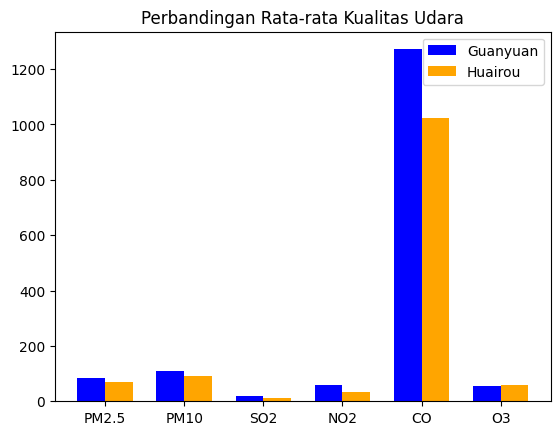

In [39]:
indicators = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
width = 0.35
x = np.arange(len(indicators))
colors = ['blue', 'orange']

plt.bar(x - width/2, guanyuan_avg, width, color=colors[0], label='Guanyuan')
plt.bar(x + width/2, huairou_avg, width,  color=colors[1], label='Huairou')

plt.legend()
plt.title('Perbandingan Rata-rata Kualitas Udara')
plt.xticks(x, indicators)
plt.show()

**Insight:**
- Pada scatter plot wilayah Guanyuan mengenai korelasi antara curah hujan dan berbagai jenis polutan, dapat disimpulkan bahwa curah hujan memiliki pengaruh negatif terhadap konsentrasi polutan (PM2.5, PM10, SO2, NO2, dan CO). Namun, hubungan tersebut tidak bersifat linier sempurna dan dipengaruhi oleh faktor lainnya.

- Pada bar chart yang menampilkan perbandingan setiap polutan antara wilayah Guanyuan dan Huairou, dapat diambil kesimpulan bahwa semua polutan kecuali O3 pada wilayah Guanyuan cenderung lebih tinggi dibandingkan Huairou dengan polutan CO yang mendominasi kedua wilayah tersebut.

## Conclusion

- Curah hujan pada wilayah Guanyuan memiliki efek penurunan kecil terhadap sebagian polutan seperti PM2.5, PM10, SO2, NO2, dan CO, namun penurunan tersebut tidak signifikan. Polutan seperti CO memiliki tingkat konsentrasi yang tinggi, sehingga curah hujan tidak cukup untuk mengurangi polusi. Adapun sebaliknya pada O3 mengalami peningkatan konsentrasi saat curah hujan terjadi.

- Kualitas udara di Guanyuan lebih buruk dibandingkan dengan Huairou, terutama dalam PM2.5, PM10, SO2, NO2, dan CO yang dimana semuanya lebih tinggi di Guanyuan.

In [40]:
guanyuan_df.to_csv("guanyuan_df.csv", index=False)

In [41]:
huairou_df.to_csv("huairou_df.csv", index=False)